In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img #for image operations
from tensorflow.keras.models import Sequential #to build model/ layers
from tensorflow.keras.layers import Dense #dense layers
from tensorflow.keras.applications.vgg16 import VGG16 #transfer learning CNN
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image #image open/resize etc, python image library
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#from google.colab import files

#uploaded = files.upload()

#upload directly in the file area, is comparitively faster

In [ ]:
!unzip airplanedataset.zip


Archive:  airplanedataset.zip
   creating: airplanedataset/
   creating: airplanedataset/Test/
   creating: airplanedataset/Test/A-10/
  inflating: airplanedataset/Test/A-10/15-1.jpg  
  inflating: airplanedataset/Test/A-10/15-10.jpg  
  inflating: airplanedataset/Test/A-10/15-11.jpg  
  inflating: airplanedataset/Test/A-10/15-12.jpg  
  inflating: airplanedataset/Test/A-10/15-13.jpg  
  inflating: airplanedataset/Test/A-10/15-14.jpg  
  inflating: airplanedataset/Test/A-10/15-15.jpg  
  inflating: airplanedataset/Test/A-10/15-16.jpg  
  inflating: airplanedataset/Test/A-10/15-17.jpg  
  inflating: airplanedataset/Test/A-10/15-18.jpg  
  inflating: airplanedataset/Test/A-10/15-19.jpg  
  inflating: airplanedataset/Test/A-10/15-2.jpg  
  inflating: airplanedataset/Test/A-10/15-20.jpg  
  inflating: airplanedataset/Test/A-10/15-3.jpg  
  inflating: airplanedataset/Test/A-10/15-4.jpg  
  inflating: airplanedataset/Test/A-10/15-5.jpg  
  inflating: airplanedataset/Test/A-10/15-6.jpg  
  in

In [ ]:
train_path="airplanedataset/Train/"
test_path="airplanedataset/Test/"


#load image
img=load_img(test_path+ "B-52/3-1.jpg")

In [ ]:
#size:
img_to_array(img).shape

(230, 266, 3)

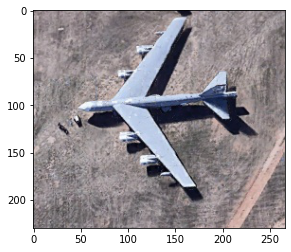

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
#train and test data set:
train_data= ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224))   #VGG16 takes in 224x224 size of image only/-
test_data= ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
noOfAirplanesTypes=5 #5 different types of airplanes/ classes

## VGG16:
original VGG16 model is designed for Imagenet data set(which is dataset of over 15 million label high resolution images belonging to roughly 22,000 categories) which has 1000 image categories which are not aircraft images. hence building our own model with using VGG16's pretrained 

In [ ]:
vgg=VGG16()

vgg_layers=vgg.layers
vgg_layers

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
#we will make a new model with vgg16 where all layers of vgg16 will be used except the last output layer of vgg16
#instead we will make new output layer according to our classes
vggmodel_layers_to_be_used=len(vgg_layers)-1

model=Sequential()

#adding neccessary layers:
for i in range(vggmodel_layers_to_be_used):
  model.add(vgg_layers[i])

In [ ]:
#we dont wanna re-train all the original 16 layers as originally in vgg16
#which has about 138million parameters. VGG has good train parametere that we'll use:
for layers in model.layers:
  layers.trainable=False

##adding our own output layer:
model.add(Dense(noOfAirplanesTypes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
#compile:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
#train model/ fit model:
batch_size=16

hist=model.fit_generator(train_data,
                         steps_per_epoch=1600//batch_size,
                         epochs=3,
                         validation_data=test_data,
                         validation_steps=800//batch_size)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
100/100 [==============================] - 1025s 10s/step - loss: 0.5918 - accuracy: 0.8206 - val_loss: 0.2303 - val_accuracy: 0.9000


### Remember: accuracy shown above is accuracy of a batch of training data and val_accuracy is accuracy of batch of testing data

In [ ]:
#trying on image:
img=Image.open("McDonnellDouglas_kc10.jpg").resize((224,224))

#convert to array for operations:
img=np.array(img)

img.shape, img.ndim   #ndim= n dimensions, return no of dimension

((224, 224, 3), 3)

In [ ]:
#our model requires 4 dimensional array so adding 1 more dimension: (-1,.....) to our array:
img=img.reshape(-1,224,224,3)

img.shape, img.ndim

((1, 224, 224, 3), 4)

In [ ]:
#Scaling data:
#scale input pixels between 1 and -1 using preprocess_input
#required by VGG16 model

img=preprocess_input(img)

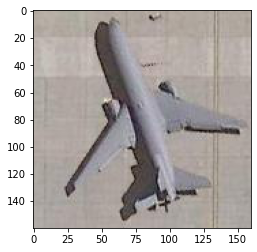

In [ ]:
#see image:
img_display=load_img("McDonnellDouglas_kc10.jpg")
plt.imshow(img_display)
plt.show()

In [ ]:
#make prediction:
pred=model.predict(img)
pred
#this will return array of probabilities (one hot encoding) , the max value is the predicted class

array([[0.00354752, 0.0301956 , 0.36492908, 0.00113992, 0.6001879 ]],
      dtype=float32)

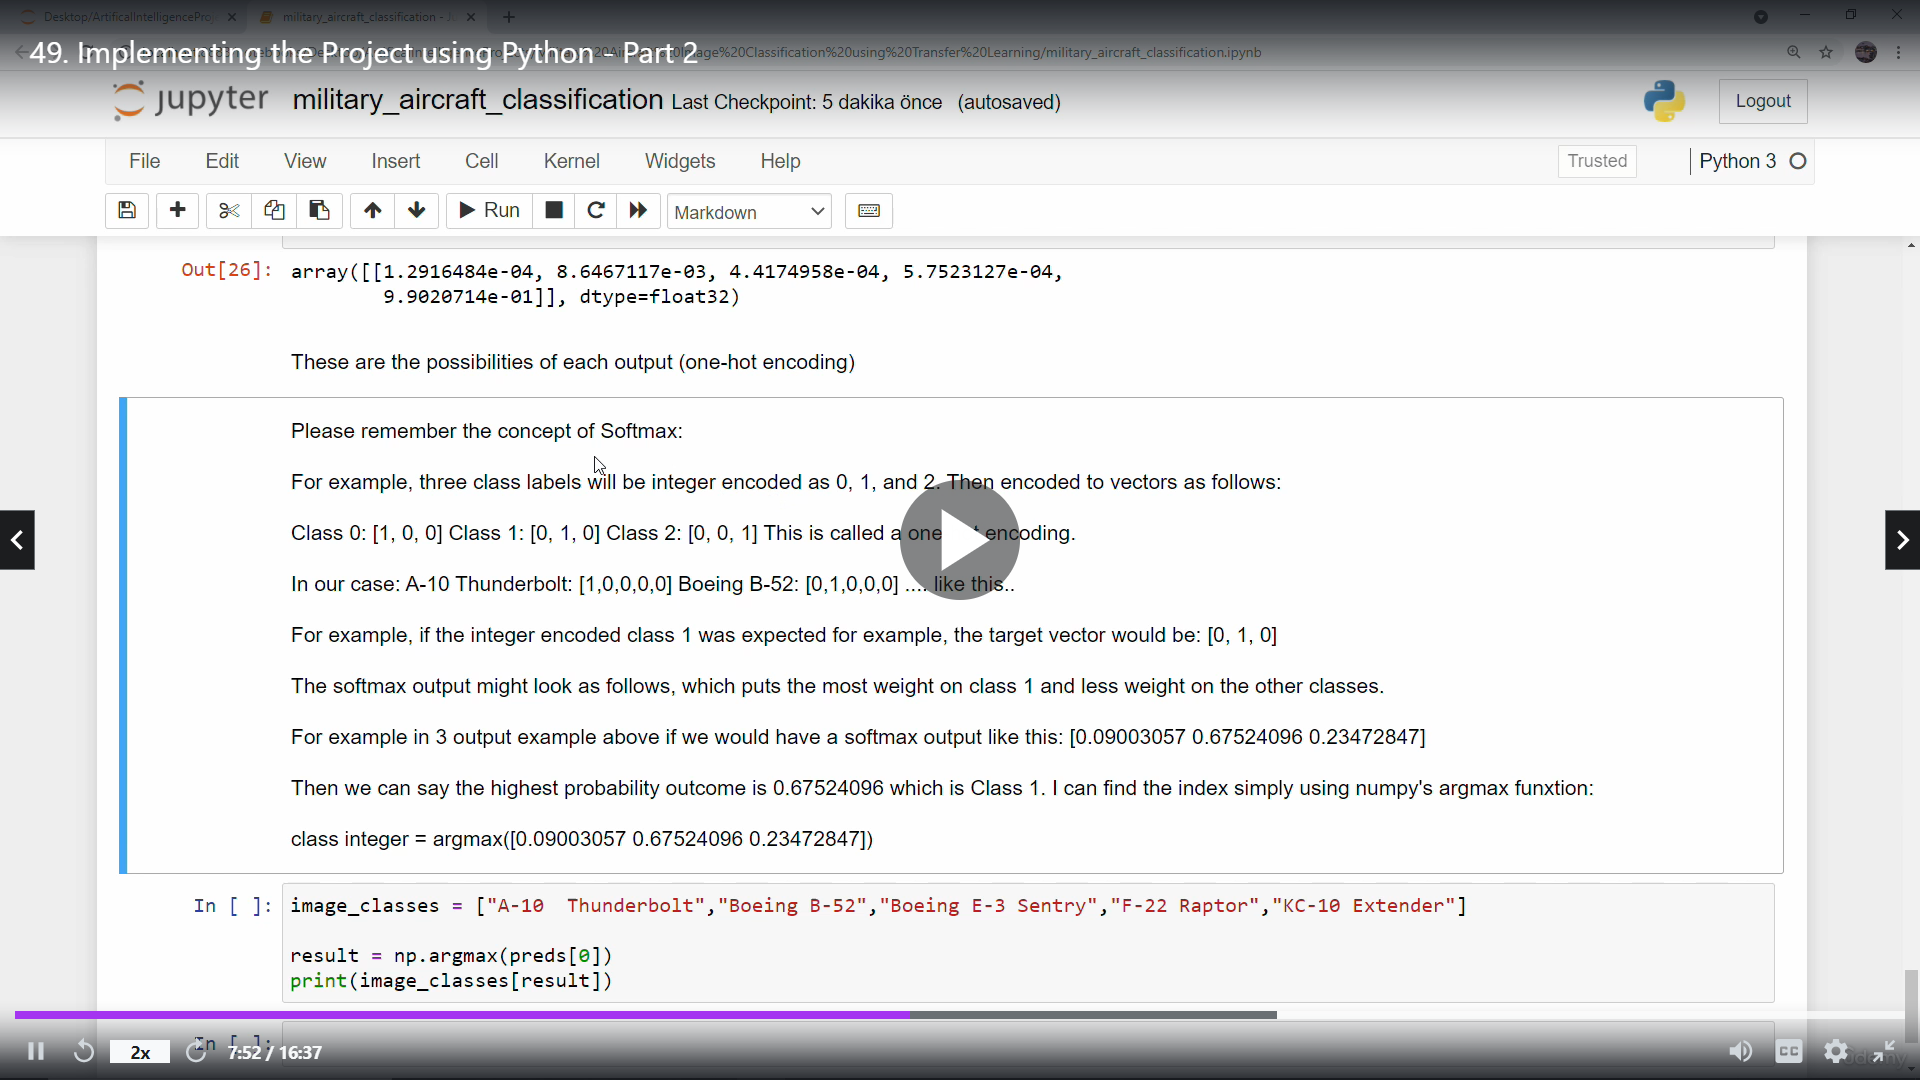

In [ ]:
#to get the name of class predicted
image_classes=["A10","B-52","E-3","F-22","KC-10"]

#argmax will return max value from the array of predicted probabilities
result=np.argmax(pred[0])
image_classes[result]

'KC-10'